# This is a sample Jupyter Notebook

Below is an example of a code cell. 
Put your cursor into the cell and press Shift+Enter to execute it and select the next one, or click 'Run Cell' button.

Press Double Shift to search everywhere for classes, files, tool windows, actions, and settings.

To learn more about Jupyter Notebooks in PyCharm, see [help](https://www.jetbrains.com/help/pycharm/ipython-notebook-support.html).
For an overview of PyCharm, go to Help -> Learn IDE features or refer to [our documentation](https://www.jetbrains.com/help/pycharm/getting-started.html).

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score

ModuleNotFoundError: No module named 'pandas'

In [22]:
data = pd.read_csv("customer_behavior_analytcis.csv")

In [23]:
data.shape

(999, 6)

In [24]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 999 entries, 0 to 998
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   total_purchases   979 non-null    float64
 1   avg_cart_value    979 non-null    float64
 2   total_time_spent  999 non-null    float64
 3   product_click     979 non-null    float64
 4   discount_counts   999 non-null    float64
 5   customer_id       999 non-null    object 
dtypes: float64(5), object(1)
memory usage: 47.0+ KB


In [25]:
data.describe()

,total_purchases,avg_cart_value,total_time_spent,product_click,discount_counts
count,979.000000,979.000000,999.000000,979.000000,999.000000
mean,11.570991,75.457978,49.348759,28.237998,4.313313
std,7.016327,55.067835,32.730973,16.296384,4.532772
min,0.000000,10.260000,5.120000,4.000000,0.000000
25%,6.000000,33.130000,22.375000,16.000000,1.000000
50%,10.000000,49.380000,40.360000,21.000000,2.000000
75%,17.000000,121.255000,77.170000,45.000000,8.000000
max,32.000000,199.770000,119.820000,73.000000,21.000000


In [26]:
data.head()

,total_purchases,avg_cart_value,total_time_spent,product_click,discount_counts,customer_id
0,7.0,129.34,52.17,18.0,0.0,CM00000
1,22.0,24.18,9.19,15.0,7.0,CM00001
2,2.0,32.18,90.69,50.0,2.0,CM00002
3,25.0,26.85,11.22,16.0,10.0,CM00003
4,7.0,125.45,34.19,30.0,3.0,CM00004


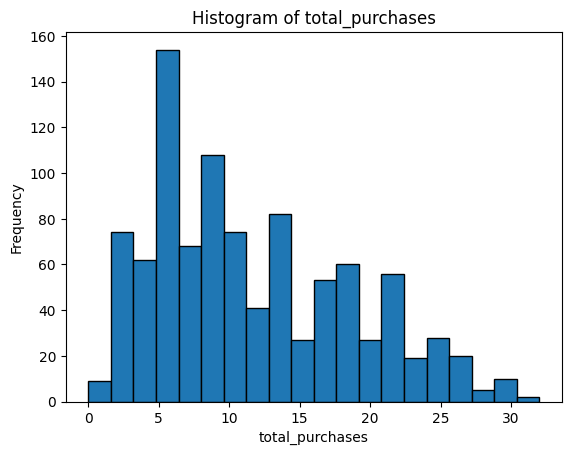

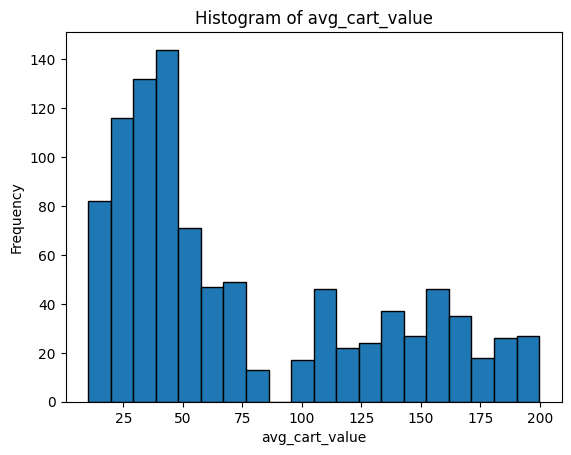

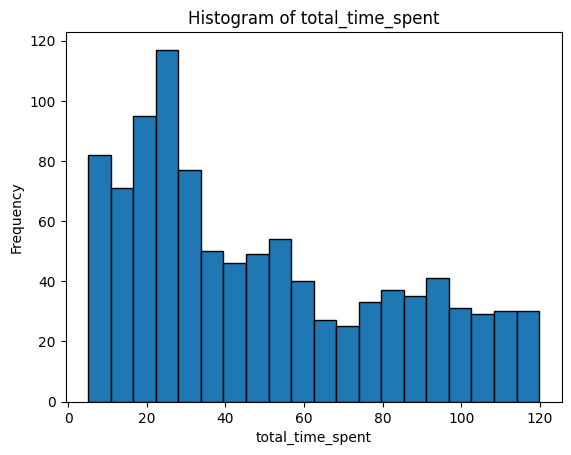

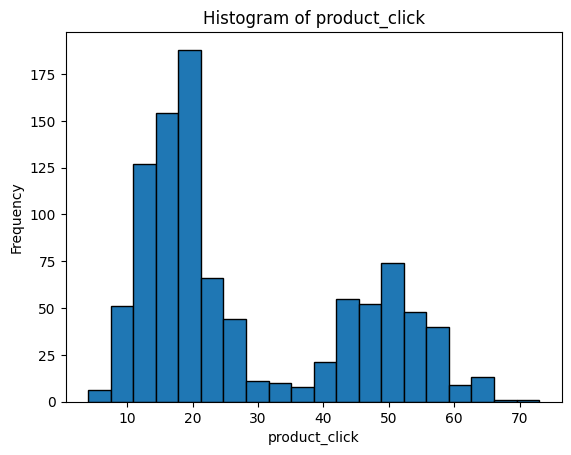

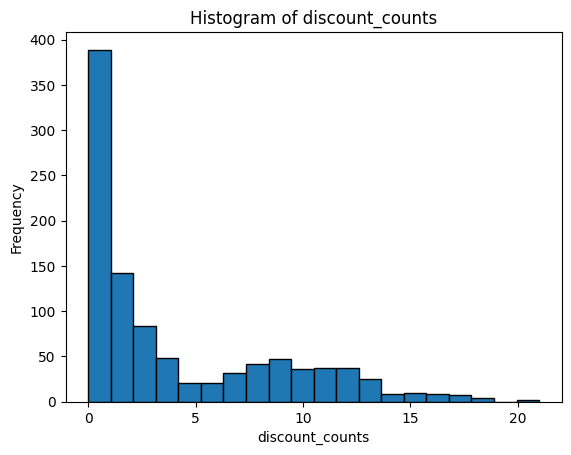

In [27]:
features = ['total_purchases', 'avg_cart_value', 'total_time_spent', 'product_click', 'discount_counts']
for feature in features:
    plt.figure()
    plt.hist(data[feature], bins=20, edgecolor='black')
    plt.title(f'Histogram of {feature}')
    plt.xlabel(feature)
    plt.ylabel("Frequency")
    plt.show()

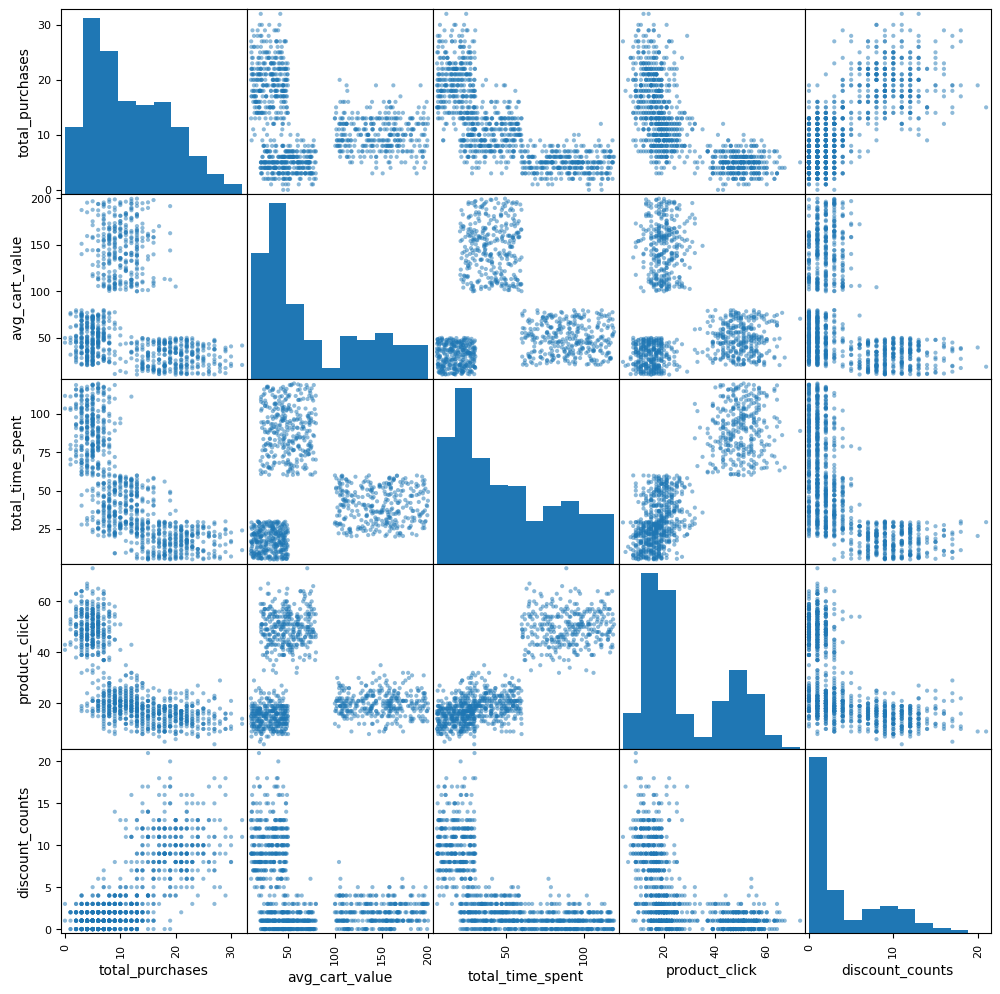

In [28]:
pd.plotting.scatter_matrix(data[features], figsize=(12, 12), diagonal='hist')
plt.show()

In [18]:
data.isnull().sum() / len(data) * 100

total_purchases     2.002002
avg_cart_value      2.002002
total_time_spent    0.000000
product_click       2.002002
discount_counts     0.000000
customer_id         0.000000
dtype: float64

In [29]:
data.isnull().sum()

total_purchases     20
avg_cart_value      20
total_time_spent     0
product_click       20
discount_counts      0
customer_id          0
dtype: int64

In [31]:
data_imputed = data.copy()
cols_to_impute = ['total_purchases', 'avg_cart_value', 'product_click']
data_imputed[cols_to_impute] = data_imputed[cols_to_impute].fillna(data_imputed[cols_to_impute].median())

In [32]:
data_imputed.shape

(999, 6)

In [33]:
data_imputed.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 999 entries, 0 to 998
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   total_purchases   999 non-null    float64
 1   avg_cart_value    999 non-null    float64
 2   total_time_spent  999 non-null    float64
 3   product_click     999 non-null    float64
 4   discount_counts   999 non-null    float64
 5   customer_id       999 non-null    object 
dtypes: float64(5), object(1)
memory usage: 47.0+ KB


In [34]:
data_imputed.isnull().sum()

total_purchases     0
avg_cart_value      0
total_time_spent    0
product_click       0
discount_counts     0
customer_id         0
dtype: int64

In [35]:
data_imputed.describe()

,total_purchases,avg_cart_value,total_time_spent,product_click,discount_counts
count,999.000000,999.000000,999.000000,999.000000,999.000000
mean,11.539540,74.935896,49.348759,28.093093,4.313313
std,6.949156,54.635622,32.730973,16.164124,4.532772
min,0.000000,10.260000,5.120000,4.000000,0.000000
25%,6.000000,33.350000,22.375000,16.000000,1.000000
50%,10.000000,49.380000,40.360000,21.000000,2.000000
75%,17.000000,118.490000,77.170000,45.000000,8.000000
max,32.000000,199.770000,119.820000,73.000000,21.000000


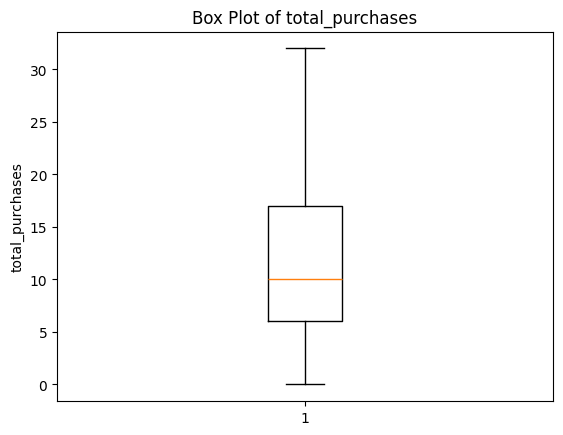

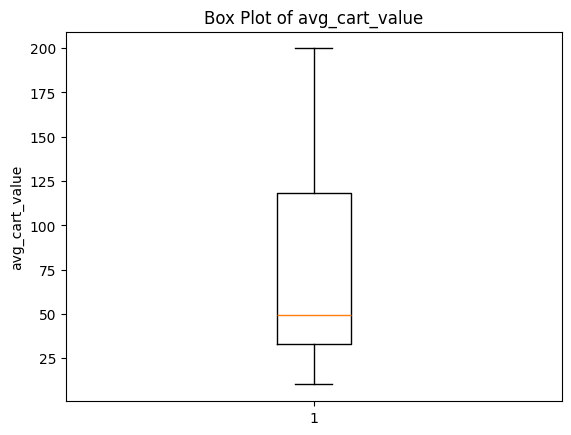

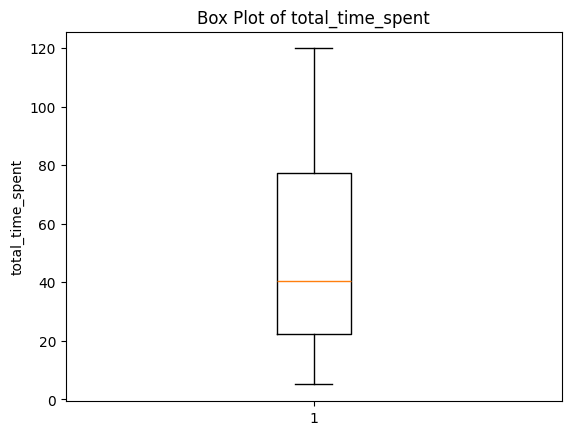

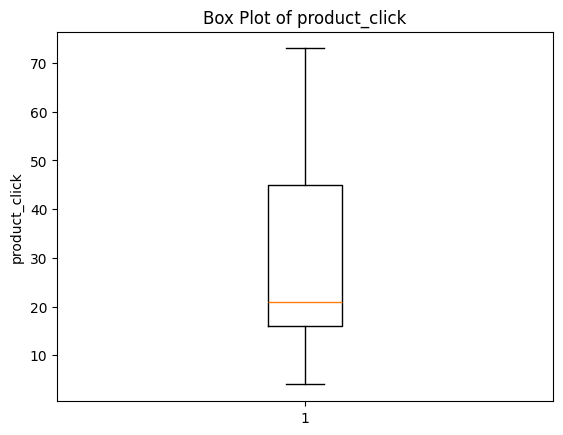

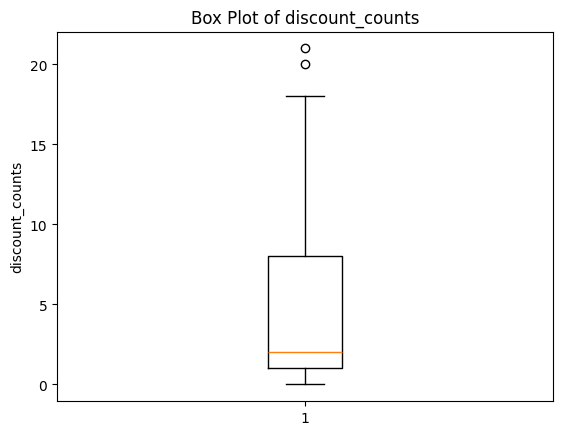

In [36]:
for feature in features:
    plt.figure()
    plt.boxplot(data_imputed[feature])
    plt.title(f'Box Plot of {feature}')
    plt.ylabel(feature)
    plt.show()

In [52]:
for feature in features:
    Q1 = data_imputed[feature].quantile(0.25)
    Q3 = data_imputed[feature].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    print(f"Feature: {feature}, lower_bound: {lower_bound}. upper_bound: {upper_bound}")

    outliers = data_imputed[(data_imputed[feature] < lower_bound) | (data_imputed[feature] > upper_bound)]
    print(f"Outliers: {len(outliers)}")


Feature: total_purchases, lower_bound: -10.5. upper_bound: 33.5
Outliers: 0
Feature: avg_cart_value, lower_bound: -94.36000000000001. upper_bound: 246.20000000000005
Outliers: 0
Feature: total_time_spent, lower_bound: -59.817499999999995. upper_bound: 159.3625
Outliers: 0
Feature: product_click, lower_bound: -27.5. upper_bound: 88.5
Outliers: 0
Feature: discount_counts, lower_bound: -9.5. upper_bound: 18.5
Outliers: 2


In [53]:
Q1 = data_imputed['discount_counts'].quantile(0.25)
Q3 = data_imputed['discount_counts'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

data_cleaned = data_imputed[(data_imputed['discount_counts'] >= lower_bound) & (data_imputed['discount_counts'] <= upper_bound)].copy()


In [54]:
data_cleaned.describe()

,total_purchases,avg_cart_value,total_time_spent,product_click,discount_counts
count,997.000000,997.000000,997.000000,997.000000,997.000000
mean,11.528586,75.027733,49.397743,28.131394,4.280843
std,6.951238,54.649916,32.744884,16.157663,4.478795
min,0.000000,10.260000,5.120000,4.000000,0.000000
25%,6.000000,33.380000,22.380000,16.000000,1.000000
50%,10.000000,49.380000,40.420000,21.000000,2.000000
75%,17.000000,118.530000,77.200000,45.000000,8.000000
max,32.000000,199.770000,119.820000,73.000000,18.000000


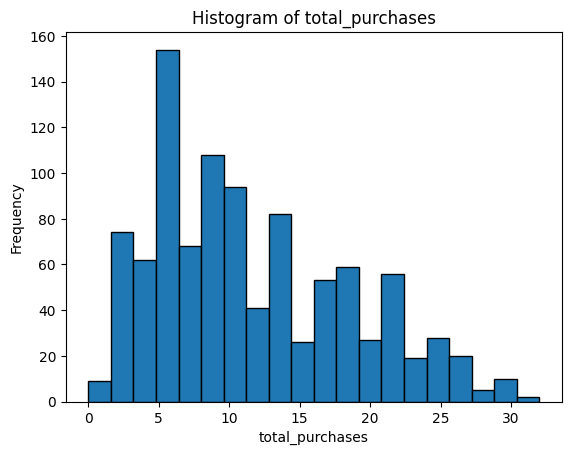

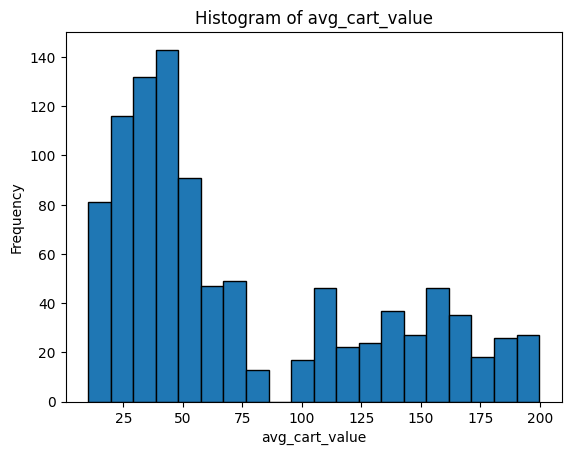

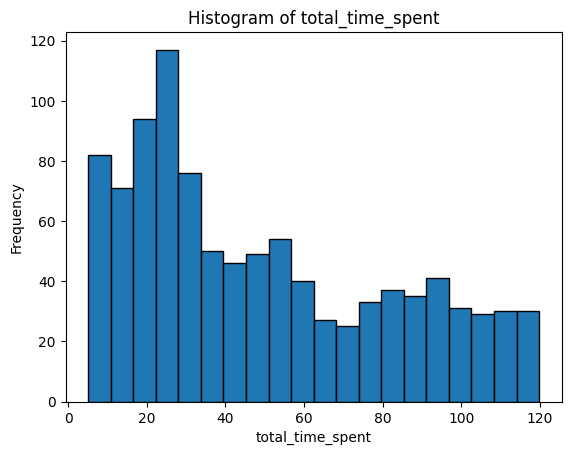

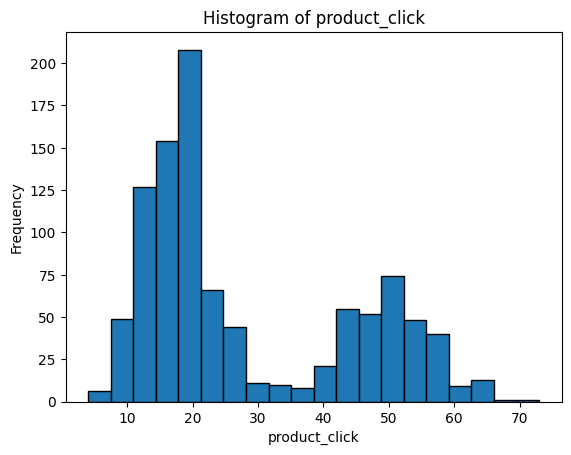

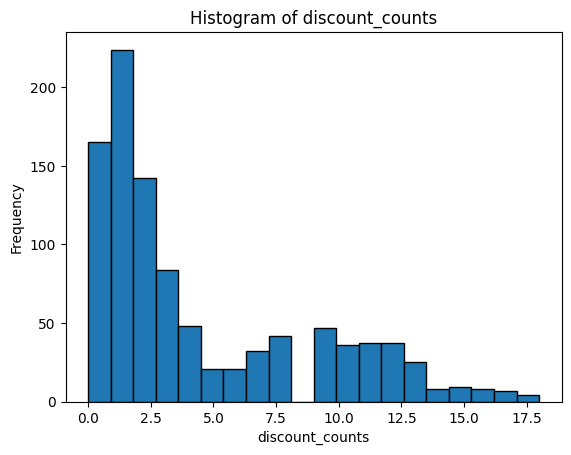

In [55]:
for feature in features:
    plt.figure()
    plt.hist(data_cleaned[feature], bins=20, edgecolor='black')
    plt.title(f'Histogram of {feature}')
    plt.xlabel(feature)
    plt.ylabel("Frequency")
    plt.show()

In [56]:
for feature in features:
    Q1 = data_cleaned[feature].quantile(0.25)
    Q3 = data_cleaned[feature].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    print(f"Feature: {feature}, lower_bound: {lower_bound}. upper_bound: {upper_bound}")

    outliers = data_cleaned[(data_cleaned[feature] < lower_bound) | (data_cleaned[feature] > upper_bound)]
    print(f"Outliers: {len(outliers)}")


Feature: total_purchases, lower_bound: -10.5. upper_bound: 33.5
Outliers: 0
Feature: avg_cart_value, lower_bound: -94.345. upper_bound: 246.255
Outliers: 0
Feature: total_time_spent, lower_bound: -59.85000000000002. upper_bound: 159.43
Outliers: 0
Feature: product_click, lower_bound: -27.5. upper_bound: 88.5
Outliers: 0
Feature: discount_counts, lower_bound: -9.5. upper_bound: 18.5
Outliers: 0


In [57]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(data_cleaned[features])


In [58]:
k = 3
kmeans = KMeans(n_clusters=k, random_state=42)
clusters = kmeans.fit_predict(X_scaled)
data_cleaned.loc[:,'cluster'] = clusters

In [59]:
silhouette_avg = silhouette_score(X_scaled, clusters)
print(f"Silhouette Score: {silhouette_avg}")


Silhouette Score: 0.6131689386458272


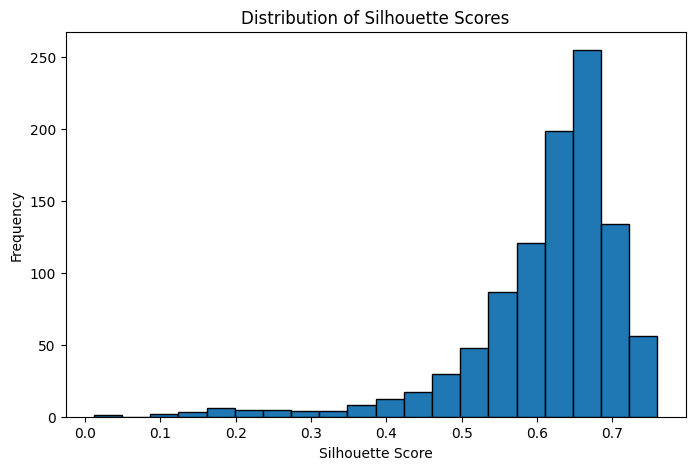

In [63]:
from sklearn.metrics import silhouette_samples
sample_silhouette_values = silhouette_samples(X_scaled, clusters)
plt.figure(figsize=(8, 5))
plt.hist(sample_silhouette_values, bins=20, edgecolor='black')
plt.title("Distribution of Silhouette Scores")
plt.xlabel("Silhouette Score")
plt.ylabel("Frequency")
plt.show()


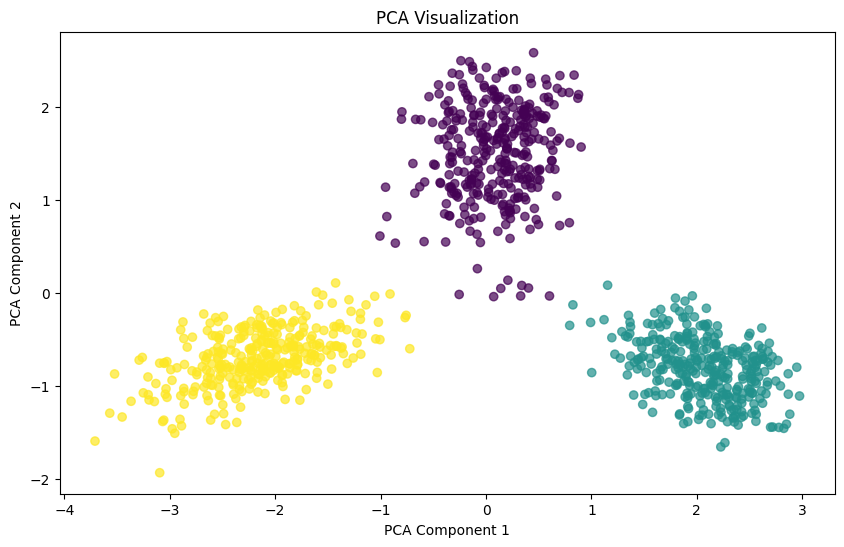

In [64]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)
plt.figure(figsize=(10, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=clusters, cmap='viridis', alpha=0.7)
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.title('PCA Visualization')
plt.show()

In [65]:
cluster_profiles = data_cleaned.groupby('cluster')[features].mean()
print("Cluster Profiles (Mean Values):")
print(cluster_profiles)


Cluster Profiles (Mean Values):
         total_purchases  avg_cart_value  total_time_spent  product_click  \
cluster                                                                     
0              10.170659      144.687874         40.472126      19.925150   
1               4.924699       49.034066         90.211837      49.370482   
2              19.522659       30.808429         17.466858      15.108761   

         discount_counts  
cluster                   
0               1.940120  
1               1.027108  
2               9.906344  


In [69]:
cluster_mapping = {
    0: 'Bargain Hunters',
    1: 'High Spenders',
    2: 'Window Shoppers'
}

data_cleaned.loc[:, 'segment'] = data_cleaned['cluster'].map(cluster_mapping)

print(data_cleaned[['cluster', 'segment']].head())


   cluster          segment
0        0  Bargain Hunters
1        2  Window Shoppers
2        1    High Spenders
3        2  Window Shoppers
4        0  Bargain Hunters


In [70]:
data_cleaned.to_csv('customer_behavior_analytics_clustered.csv', index=False)